___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
seed = random_state = 42

In [4]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [7]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

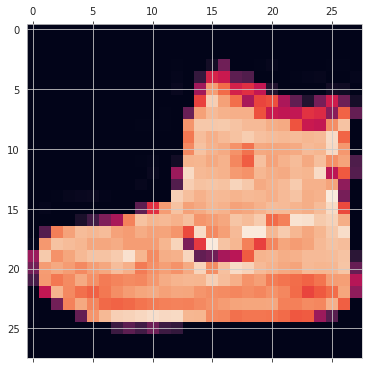

In [9]:
# plt.imshow(X_train[0])
plt.matshow(X_train[0])

In [10]:
y_train[0]

9

In [11]:
y_train.shape

(60000,)

In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [14]:
pd.Series(y_train.flatten()).value_counts().sort_index()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

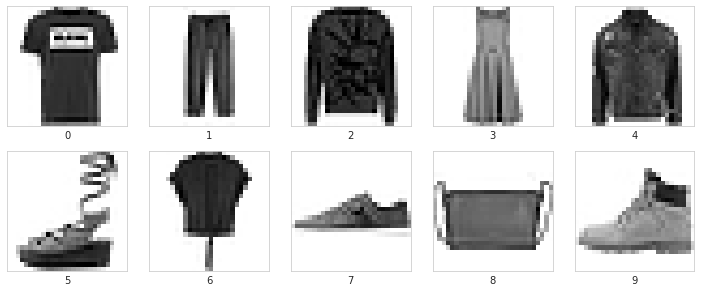

In [15]:
plt.figure(figsize=(10,10))
for i in np.unique(y_train):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[y_train==i][i] / 255.0, cmap=plt.cm.binary)
    plt.grid(False)
    plt.xlabel(i)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [16]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

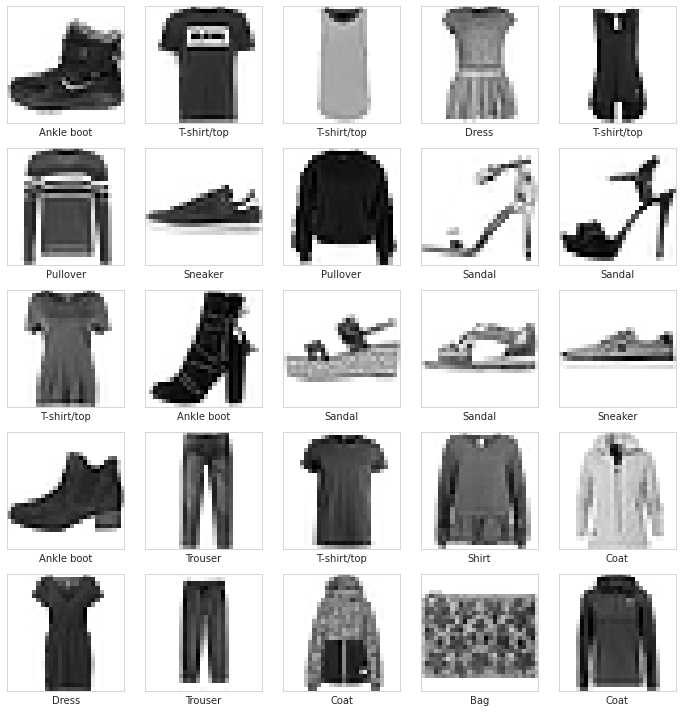

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.grid(False)
    plt.xlabel(classes[y_train[i]])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [18]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [19]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [20]:
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

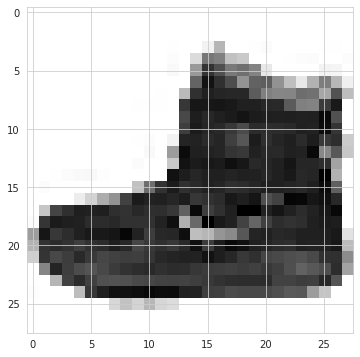

In [21]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [23]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [24]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [25]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [26]:
image_shape = X_train[0].shape
image_shape

(28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
np.unique(y_train).size

10

In [29]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [30]:
y_train[0]

9

In [31]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [33]:
model1 = Sequential()

model1.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

model1.add(Flatten())

model1.add(Dense(128))
model1.add(Activation('relu'))

model1.add(Dense(10))
model1.add(Activation('softmax'))

# optimizer = keras.optimizers.Adam(lr=0.01)
precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
model1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy', 'Recall', 'AUC', precision_at_recall])

In [34]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [35]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=9, restore_best_weights = True)

In [36]:
%%time
model1.fit(
    X_train, Y_train, 
    epochs=50,
    batch_size=32,  
    validation_data=(X_test,Y_test),
    callbacks=[early_stop]
)

Epoch 1/50
1875/1875 [==============================] - 20s 8ms/step - loss: 0.0684 - accuracy: 0.8671 - recall: 0.8529 - auc: 0.9866 - precision_at_recall: 0.9250 - val_loss: 0.0569 - val_accuracy: 0.8914 - val_recall: 0.8844 - val_auc: 0.9875 - val_precision_at_recall: 0.9494
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0479 - accuracy: 0.9072 - recall: 0.9015 - auc: 0.9912 - precision_at_recall: 0.9696 - val_loss: 0.0516 - val_accuracy: 0.9017 - val_recall: 0.8930 - val_auc: 0.9892 - val_precision_at_recall: 0.9622
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0422 - accuracy: 0.9200 - recall: 0.9154 - auc: 0.9923 - precision_at_recall: 0.9793 - val_loss: 0.0528 - val_accuracy: 0.9025 - val_recall: 0.8969 - val_auc: 0.9886 - val_precision_at_recall: 0.9650
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0390 - accuracy: 0.9277 - recall: 0.9239 - auc: 0.9932 - precision_at_recall: 0.9826

In [37]:
# save model permanently and check
model1.save('/content/drive/MyDrive/fashion_mnist1.h5')

In [38]:
model1.metrics_names

['loss', 'accuracy', 'recall', 'auc', 'precision_at_recall']

In [39]:
summary1 = pd.DataFrame(model1.history.history)
summary1.index += 1
summary1.tail()

,loss,accuracy,recall,auc,precision_at_recall,val_loss,val_accuracy,val_recall,val_auc,val_precision_at_recall
15,0.025,0.960,0.957,0.996,0.994,0.065,0.908,0.905,0.982,0.964
16,0.024,0.960,0.959,0.996,0.994,0.077,0.910,0.909,0.978,0.968
17,0.024,0.962,0.960,0.996,0.994,0.075,0.906,0.904,0.979,0.963
18,0.023,0.964,0.962,0.996,0.994,0.079,0.910,0.908,0.978,0.967
19,0.022,0.965,0.963,0.996,0.994,0.081,0.909,0.907,0.977,0.964


**TASK 7: Plot values of metrics you used in your model.**

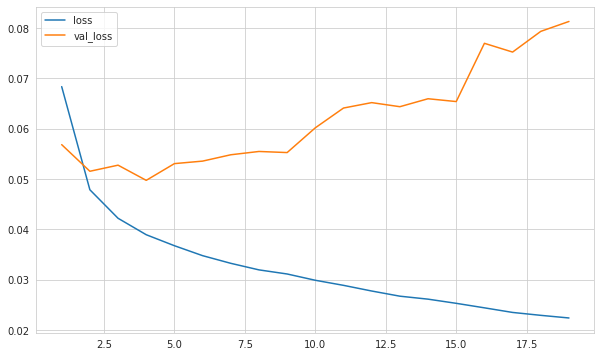

In [40]:
summary1[["loss", "val_loss"]].plot();

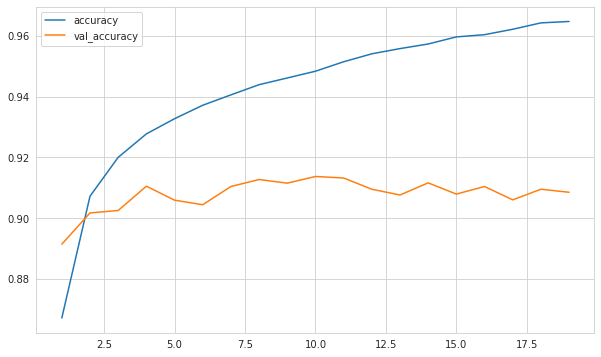

In [41]:
summary1[["accuracy", "val_accuracy"]].plot();

# Modelling-2

In [42]:
model2 = Sequential()

model2.add(Conv2D(filters=64, kernel_size=(4,4), strides=(1,1),input_shape=image_shape, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters=64, kernel_size=(4,4), strides=(1,1), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
model2.add(Dropout(0.5))

model2.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
model2.add(Dropout(0.5))

model2.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Flatten())

model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(10))
model2.add(Activation('softmax'))

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
model2.compile(loss='binary_crossentropy',
              optimizer='nadam',
              metrics=['accuracy', 'Recall', 'AUC', precision_at_recall])

In [43]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        1088      
                                                                 
 batch_normalization (BatchN  (None, 25, 25, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        65600     
                                                                 
 batch_normalization_1 (Batc  (None, 21, 21, 64)      

In [44]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)

In [45]:
%%time
model2.fit(
    X_train, Y_train, 
    epochs=50,
    batch_size=32,  
    validation_data=(X_test,Y_test),
    callbacks=[early_stop]
)

Epoch 1/50
1875/1875 [==============================] - 42s 20ms/step - loss: 0.1354 - accuracy: 0.8188 - recall: 0.7725 - auc: 0.9782 - precision_at_recall_1: 0.8441 - val_loss: 0.0631 - val_accuracy: 0.8759 - val_recall: 0.8682 - val_auc: 0.9839 - val_precision_at_recall_1: 0.9357
Epoch 2/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0651 - accuracy: 0.8774 - recall: 0.8672 - auc: 0.9861 - precision_at_recall_1: 0.9370 - val_loss: 0.0576 - val_accuracy: 0.8850 - val_recall: 0.8777 - val_auc: 0.9865 - val_precision_at_recall_1: 0.9469
Epoch 3/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0569 - accuracy: 0.8911 - recall: 0.8837 - auc: 0.9886 - precision_at_recall_1: 0.9532 - val_loss: 0.0502 - val_accuracy: 0.8999 - val_recall: 0.8947 - val_auc: 0.9886 - val_precision_at_recall_1: 0.9639
Epoch 4/50
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0528 - accuracy: 0.8995 - recall: 0.8927 - auc: 0.9893 - precision_a

In [46]:
# save model permanently and check
model2.save('/content/drive/MyDrive/fashion_mnist2.h5')

In [47]:
model2.metrics_names

['loss', 'accuracy', 'recall', 'auc', 'precision_at_recall_1']

In [48]:
summary2 = pd.DataFrame(model2.history.history)
summary2.index += 1
summary2.tail()

,loss,accuracy,recall,auc,precision_at_recall_1,val_loss,val_accuracy,val_recall,val_auc,val_precision_at_recall_1
17,0.027,0.951,0.949,0.995,0.993,0.043,0.926,0.925,0.986,0.979
18,0.026,0.953,0.951,0.995,0.994,0.058,0.901,0.899,0.979,0.963
19,0.025,0.955,0.954,0.995,0.993,0.049,0.919,0.917,0.982,0.972
20,0.024,0.957,0.955,0.996,0.994,0.044,0.928,0.927,0.985,0.976
21,0.023,0.958,0.957,0.996,0.994,0.052,0.912,0.910,0.982,0.973


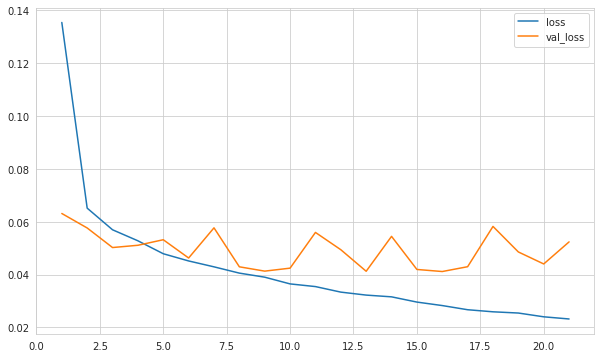

In [49]:
summary2[["loss", "val_loss"]].plot();

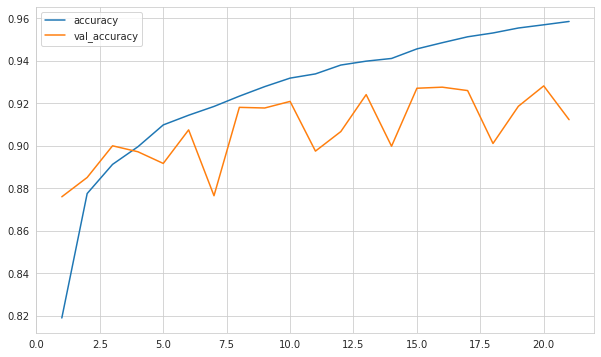

In [50]:
summary2[["accuracy", "val_accuracy"]].plot();

# Compare and Select Models

In [51]:
# metrics = ['loss', 'accuracy', 'recall', 'auc', 'precision_at_recall']
colors  = plt.rcParams['axes.prop_cycle'].by_key()['color'] # or use ['b', 'orange', 'g', 'r', 'm', 'brown', 'pink', 'grey', 'y', 'c', 'k', 'w'] 

def plot_metrics(history, metrics):
  for n, metric in enumerate(metrics):
    name = str(metric).replace("_"," ").capitalize()
    plt.subplot(3, 2, n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[1], label='Val', linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([plt.ylim()[0], plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([plt.ylim()[0], plt.ylim()[1]])
    else:
      plt.ylim([plt.ylim()[0], 1])

    plt.legend();

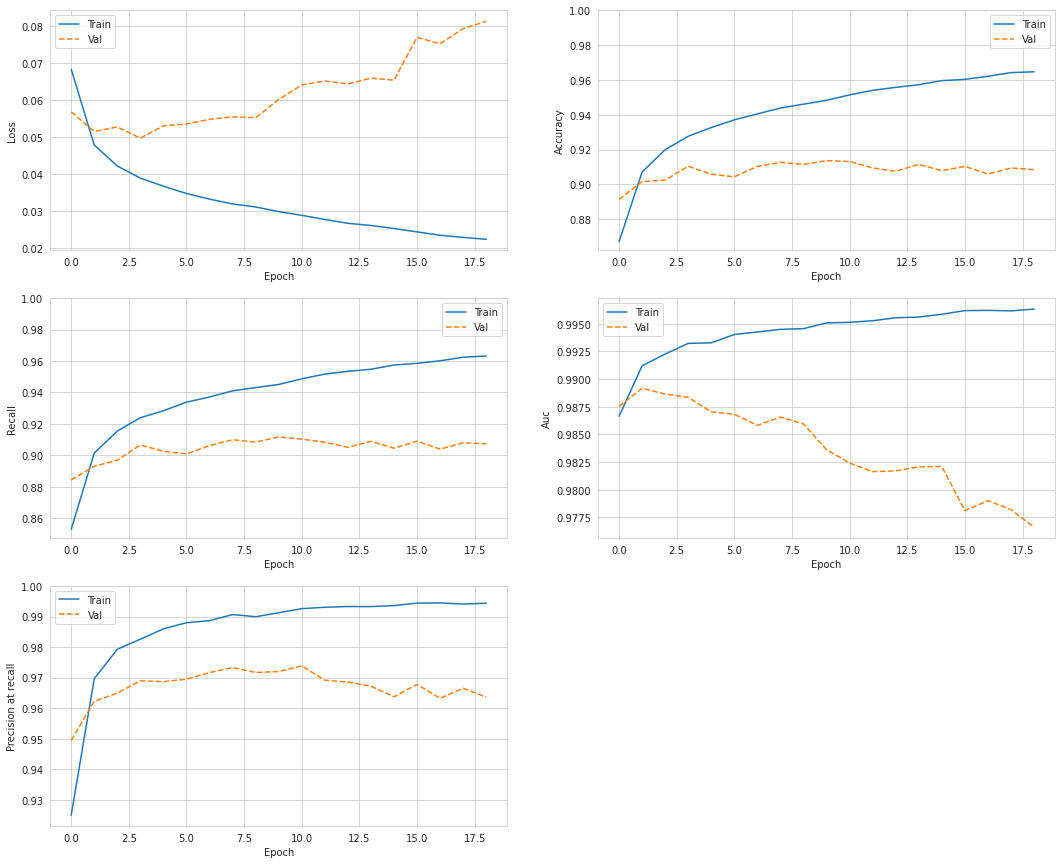

In [52]:
metrics = summary1.columns[:5]
plt.figure(figsize=(18,15))
plot_metrics(model1.history, metrics=metrics)

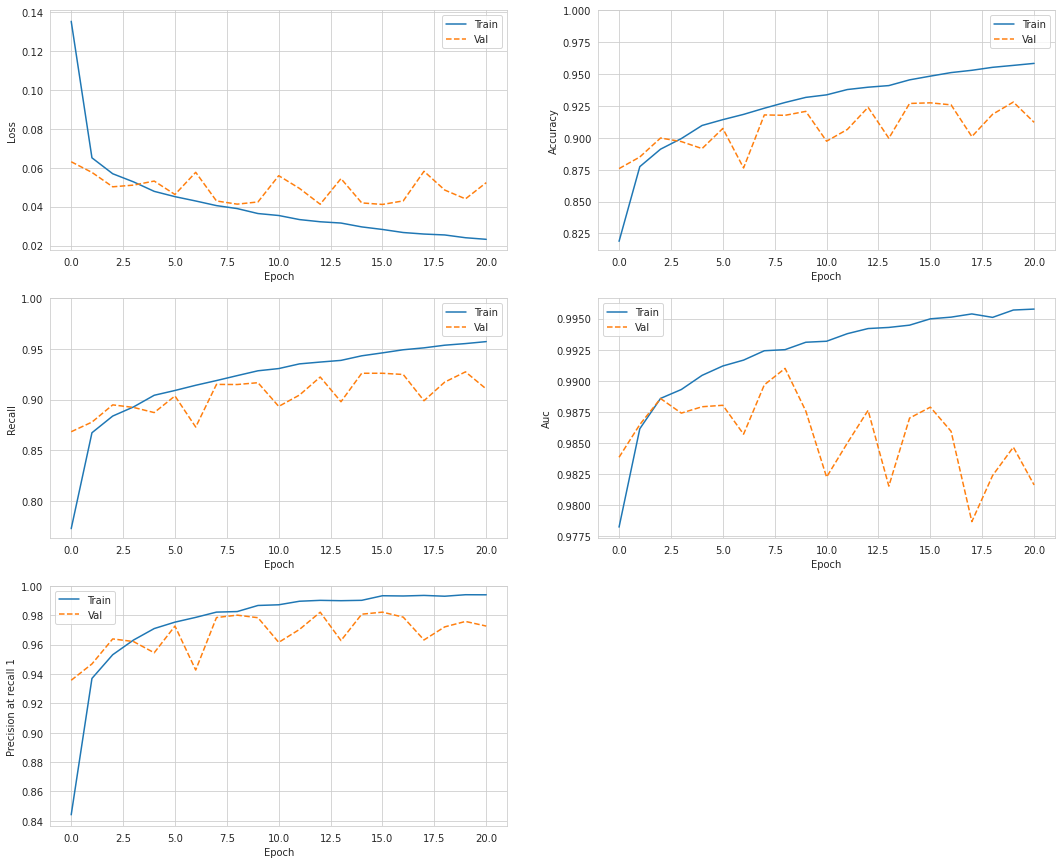

In [53]:
metrics = summary2.columns[:5]
plt.figure(figsize=(18,15))
plot_metrics(model2.history, metrics=metrics)

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
score = model2.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0411 - accuracy: 0.9275 - recall: 0.9259 - auc: 0.9879 - precision_at_recall_1: 0.9822
Test loss: 0.04114867001771927
Test accuracy: 0.9275000095367432


In [56]:
pred_prob = model2.predict(X_test)
pred_prob

array([[7.2835384e-11, 3.0160978e-11, 9.9598607e-11, ..., 1.8842696e-09,
        2.6459841e-12, 1.0000000e+00],
       [3.1791387e-09, 1.2313581e-10, 9.9999869e-01, ..., 1.4333293e-10,
        2.1635528e-12, 1.9220816e-11],
       [4.9708366e-15, 1.0000000e+00, 2.0838393e-13, ..., 3.0791626e-13,
        6.1435986e-15, 1.9815141e-14],
       ...,
       [5.9469161e-12, 8.9595073e-14, 3.1549589e-11, ..., 1.0611831e-13,
        1.0000000e+00, 3.0150167e-11],
       [8.4663524e-17, 1.0000000e+00, 1.3611924e-15, ..., 2.3900790e-15,
        1.9106459e-16, 9.8822519e-16],
       [1.7109168e-11, 7.6356126e-12, 7.8082699e-15, ..., 1.1548111e-10,
        5.1406423e-12, 5.1689885e-12]], dtype=float32)

In [57]:
y_pred = np.argmax(pred_prob, axis=1)

In [58]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1000
           1       0.99      0.99      0.99      1000
           2       0.89      0.91      0.90      1000
           3       0.91      0.95      0.93      1000
           4       0.90      0.89      0.89      1000
           5       0.99      0.99      0.99      1000
           6       0.82      0.73      0.78      1000
           7       0.97      0.97      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [60]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

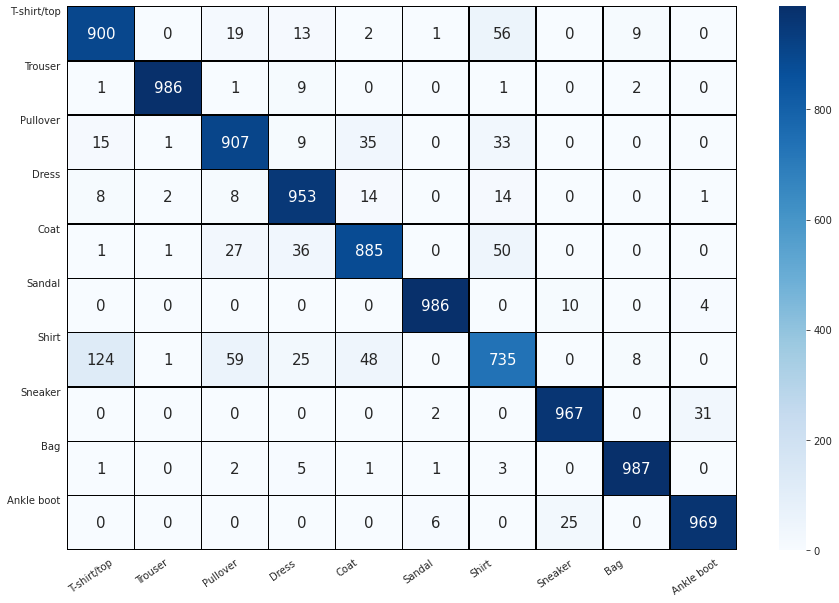

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(
    confusion_matrix(y_test, y_pred), 
    annot=True, cmap="Blues", lw=.5, linecolor='black', 
    fmt='g', annot_kws = {"size": 15}
)
plt.xticks(range(len(classes)), classes, rotation=35, ha='left');
plt.yticks(range(len(classes)), classes, rotation=0, ha='right', va='top');

In [62]:
(y_test!=y_pred).sum()

725

## Prediction

In [63]:
model = tf.keras.models.load_model('/content/drive/MyDrive/fashion_mnist2.h5')

In [64]:
X_test[0].shape

(28, 28, 1)

In [71]:
np.expand_dims(X_test[0],axis=0).shape, X_test[0].reshape(1, 28, 28, 1).shape

((1, 28, 28, 1), (1, 28, 28, 1))

In [66]:
pred = model.predict(np.expand_dims(X_test[0], axis=0))

In [67]:
np.argmax(pred)

9

In [68]:
classes[9]

'Ankle boot'

In [73]:
X_test[0].squeeze().shape, X_test[0].reshape(28, 28).shape

((28, 28), (28, 28))

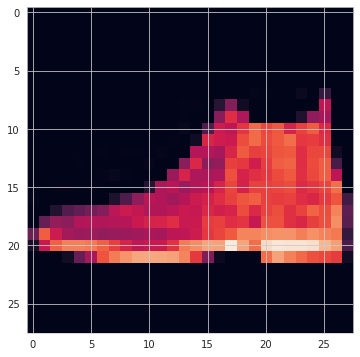

In [69]:
plt.imshow(X_test[0].squeeze())

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___